# **Child Mind Institute — Problematic Internet Use**

En la era digital actual, el uso problemático de internet entre niños y adolescentes es una preocupación creciente. Comprender mejor este problema es crucial para abordar problemas de salud mental como la depresión y la ansiedad.

Los métodos actuales para medir el uso problemático de internet en niños y adolescentes suelen ser complejos y requieren evaluaciones profesionales. Esto crea barreras de acceso, culturales y lingüísticas para muchas familias. Debido a estas limitaciones, el uso problemático de internet a menudo no se mide directamente, sino que se asocia con problemas como la depresión y la ansiedad en los jóvenes.

Por el contrario, las mediciones de condición física son extremadamente accesibles y están ampliamente disponibles con una intervención mínima o sin necesidad de experiencia clínica. Los cambios en los hábitos físicos, como una peor postura, una dieta irregular y una actividad física reducida, son comunes en los usuarios excesivos de tecnología. Proponemos usar estos indicadores de condición física, que son fáciles de obtener, como proxies para identificar el uso problemático de internet, especialmente en contextos donde falta experiencia clínica o herramientas de evaluación adecuadas.

El objetivo es desarrollar un modelo predictivo capaz de analizar datos de actividad física de los niños para detectar indicadores tempranos de uso problemático de internet y tecnología. Esto permitirá intervenciones tempranas destinadas a promover hábitos digitales más saludables.

In [3]:
# Clone the repository to get data
!git clone https://github.com/amadorssa/ChildInternetUseAnalysis.git

!ls ChildInternetUseAnalysis/data/

fatal: destination path 'ChildInternetUseAnalysis' already exists and is not an empty directory.
data_dictionary.csv   test.csv
sample_submission.csv train.csv


In [4]:
import pandas as pd

In [ ]:
# train_df = pd.read_csv('ChildInternetUseAnalysis/data/train.csv')
# test_df = pd.read_csv('ChildInternetUseAnalysis/data/test.csv')

In [5]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
dictionary_df = pd.read_csv('data/data_dictionary.csv')

### 1. Análisis exploratorio sencillo de los datos (que datos tenemos, que tipo son los datos, si hay o no datos faltantes, si hay datos numéricos, que distribución tienen, y si hay cualitativos si son ordenados o no por ejemplo).


##### Analisis exploratorio de los datos

In [6]:
display(train_df.head())

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Resumen general de los datos de entrenamiento
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [8]:
dictionary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Instrument    81 non-null     object
 1   Field         81 non-null     object
 2   Description   81 non-null     object
 3   Type          81 non-null     object
 4   Values        42 non-null     object
 5   Value Labels  32 non-null     object
dtypes: object(6)
memory usage: 3.9+ KB


In [9]:
# Obtener una lista con las filas de la columna 'Field' de dictionary_df que que tienen str en la columna 'Type'
str_df = dictionary_df[dictionary_df['Type'] == 'str'][['Field', 'Values']]

display(str_df)

# Imprimir los valores únicos de la columna 'Value Labels' de str_df
print(str_df['Values'].unique())

,Field,Values
0,id,NaN
1,Basic_Demos-Enroll_Season,"Spring, Summer, Fall, Winter"
4,CGAS-Season,"Spring, Summer, Fall, Winter"
6,Physical-Season,"Spring, Summer, Fall, Winter"
14,Fitness_Endurance-Season,"Spring, Summer, Fall, Winter"
18,FGC-Season,"Spring, Summer, Fall, Winter"
33,BIA-Season,"Spring, Summer, Fall, Winter"
50,PAQ_A-Season,"Spring, Summer, Fall, Winter"
52,PAQ_C-Season,"Spring, Summer, Fall, Winter"
54,PCIAT-Season,"Spring, Summer, Fall, Winter"


[nan 'Spring, Summer, Fall, Winter']


In [10]:
# Eliminar la primera fila de str_df
str_df = str_df.drop(index=0)

In [11]:
# Obtener una array con las filas de la columna 'Field' de dictionary_df que que tienen str en la columna 'Type'
categorical_df = dictionary_df[dictionary_df['Type'] == 'categorical int'][['Field', 'Value Labels']]

display(categorical_df)

,Field,Value Labels
3,Basic_Demos-Sex,"0=Male, 1=Female"
20,FGC-FGC_CU_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
22,FGC-FGC_GSND_Zone,"1=Weak, 2=Normal, 3=Strong"
24,FGC-FGC_GSD_Zone,"1=Weak, 2=Normal, 3=Strong"
26,FGC-FGC_PU_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
28,FGC-FGC_SRL_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
30,FGC-FGC_SRR_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
32,FGC-FGC_TL_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
34,BIA-BIA_Activity_Level_num,"1=Very Light, 2=Light, 3=Moderate, 4=Heavy, 5=..."
44,BIA-BIA_Frame_num,"1=Small, 2=Medium, 3=Large"


##### Manejar valores faltantes

In [12]:
# Eliminar filas con valores faltantes en la columna 'sii' de train_df
train_df = train_df.dropna(subset=['sii'])

# Dado que el id no es una variable predictora, se elimina de los datos de entrenamiento
train_df = train_df.drop(columns=['id'])

In [13]:
# Valores faltantes
missing_values = train_df.isnull().mean()*100
missing_values = missing_values[missing_values > 35]

# Crear dataframe con los valores faltantes
missing_values_df = pd.DataFrame({'Variable': missing_values.index, 'Porcentaje': missing_values.values})

display(missing_values_df)

,Variable,Porcentaje
0,Physical-Waist_Circumference,82.346491
1,Fitness_Endurance-Season,53.947368
2,Fitness_Endurance-Max_Stage,73.282164
3,Fitness_Endurance-Time_Mins,73.391813
4,Fitness_Endurance-Time_Sec,73.391813
5,FGC-FGC_GSND,68.128655
6,FGC-FGC_GSND_Zone,68.421053
7,FGC-FGC_GSD,68.165205
8,FGC-FGC_GSD_Zone,68.421053
9,PAQ_A-Season,86.732456


In [14]:
# Eliminar columnas con más del 35% de valores faltantes
train_df = train_df.drop(columns=missing_values_df['Variable'])

In [15]:
# Valores faltantes
values = train_df.isnull().mean()*100
values = values[values < 35]
values = values[values > 10]

# Crear dataframe con los valores faltantes
values_df = pd.DataFrame({'Variable': values.index, 'Porcentaje': values.values})

display(values_df)

,Variable,Porcentaje
0,CGAS-Season,14.400585
1,CGAS-CGAS_Score,14.400585
2,FGC-FGC_CU,29.861111
3,FGC-FGC_CU_Zone,31.140351
4,FGC-FGC_PU,30.226608
5,FGC-FGC_PU_Zone,31.469298
6,FGC-FGC_SRL,30.153509
7,FGC-FGC_SRL_Zone,31.396199
8,FGC-FGC_SRR,30.080409
9,FGC-FGC_SRR_Zone,31.323099


In [16]:
# Eliminar filas con valoriables eliminadas en el paso anterior en los dataframes str_df y categorical_df
str_df = str_df[~str_df['Field'].isin(missing_values_df['Variable'])]

categorical_df = categorical_df[~categorical_df['Field'].isin(missing_values_df['Variable'])]

##### Codificación de variables categóricas

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Inicializar el codificador
label_encoder = LabelEncoder()

# Variables binarias
binary_columns = ['Basic_Demos-Sex', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone']

# Aplicar Label Encoding
for col in binary_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# Verificar las primeras filas
display(train_df[binary_columns].head())


,Basic_Demos-Sex,FGC-FGC_CU_Zone,FGC-FGC_PU_Zone,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL_Zone
0,0,0,0,0,0,1
1,0,0,0,1,1,0
2,1,1,1,1,1,0
3,0,1,0,0,0,1
5,1,0,0,1,1,0


In [19]:
# Aplicar one-hot encoding a train_df con las columnas de srt_df
train_df = pd.get_dummies(train_df, columns=str_df['Field'])

# Aplicar One-Hot Encoding para las variables con más de dos categorías
train_df = pd.get_dummies(train_df, columns=[
    'BIA-BIA_Activity_Level_num',
    'BIA-BIA_Frame_num', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03',
    'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07',
    'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11',
    'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15',
    'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19',
    'PCIAT-PCIAT_20', 'PreInt_EduHx-computerinternet_hoursday'
], drop_first=True)

# Verificar las primeras filas después de One-Hot Encoding
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Columns: 178 entries, Basic_Demos-Age to PreInt_EduHx-computerinternet_hoursday_3.0
dtypes: bool(141), float64(30), int64(7)
memory usage: 1.2 MB


##### Imputación de valores faltantes

In [20]:
# Identificar columnas numéricas
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
print("\nColumnas numéricas:")
print(numeric_cols)

# Identificar columnas categóricas
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("\nColumnas categóricas:")
print(categorical_cols)

print(train_df.dtypes)



Columnas numéricas:
Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU',
       'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL',
       'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL',
       'FGC-FGC_TL_Zone', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR',
       'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI',
       'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PCIAT-PCIAT_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'sii'],
      dtype='object')

Columnas categóricas:
Index([], dtype='object')
Basic_Demos-Age                                 int64
Basic_Demos-Sex                                 int64
CGAS-CGAS_Score                               float64
Physical-BMI                                 

In [21]:
# Imputar valores faltantes numéricos con la media
for col in numeric_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mean())

In [22]:
print(train_df[numeric_cols].isnull().sum())


Basic_Demos-Age          0
Basic_Demos-Sex          0
CGAS-CGAS_Score          0
Physical-BMI             0
Physical-Height          0
Physical-Weight          0
Physical-Diastolic_BP    0
Physical-HeartRate       0
Physical-Systolic_BP     0
FGC-FGC_CU               0
FGC-FGC_CU_Zone          0
FGC-FGC_PU               0
FGC-FGC_PU_Zone          0
FGC-FGC_SRL              0
FGC-FGC_SRL_Zone         0
FGC-FGC_SRR              0
FGC-FGC_SRR_Zone         0
FGC-FGC_TL               0
FGC-FGC_TL_Zone          0
BIA-BIA_BMC              0
BIA-BIA_BMI              0
BIA-BIA_BMR              0
BIA-BIA_DEE              0
BIA-BIA_ECW              0
BIA-BIA_FFM              0
BIA-BIA_FFMI             0
BIA-BIA_FMI              0
BIA-BIA_Fat              0
BIA-BIA_ICW              0
BIA-BIA_LDM              0
BIA-BIA_LST              0
BIA-BIA_SMM              0
BIA-BIA_TBW              0
PCIAT-PCIAT_Total        0
SDS-SDS_Total_Raw        0
SDS-SDS_Total_T          0
sii                      0
d

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

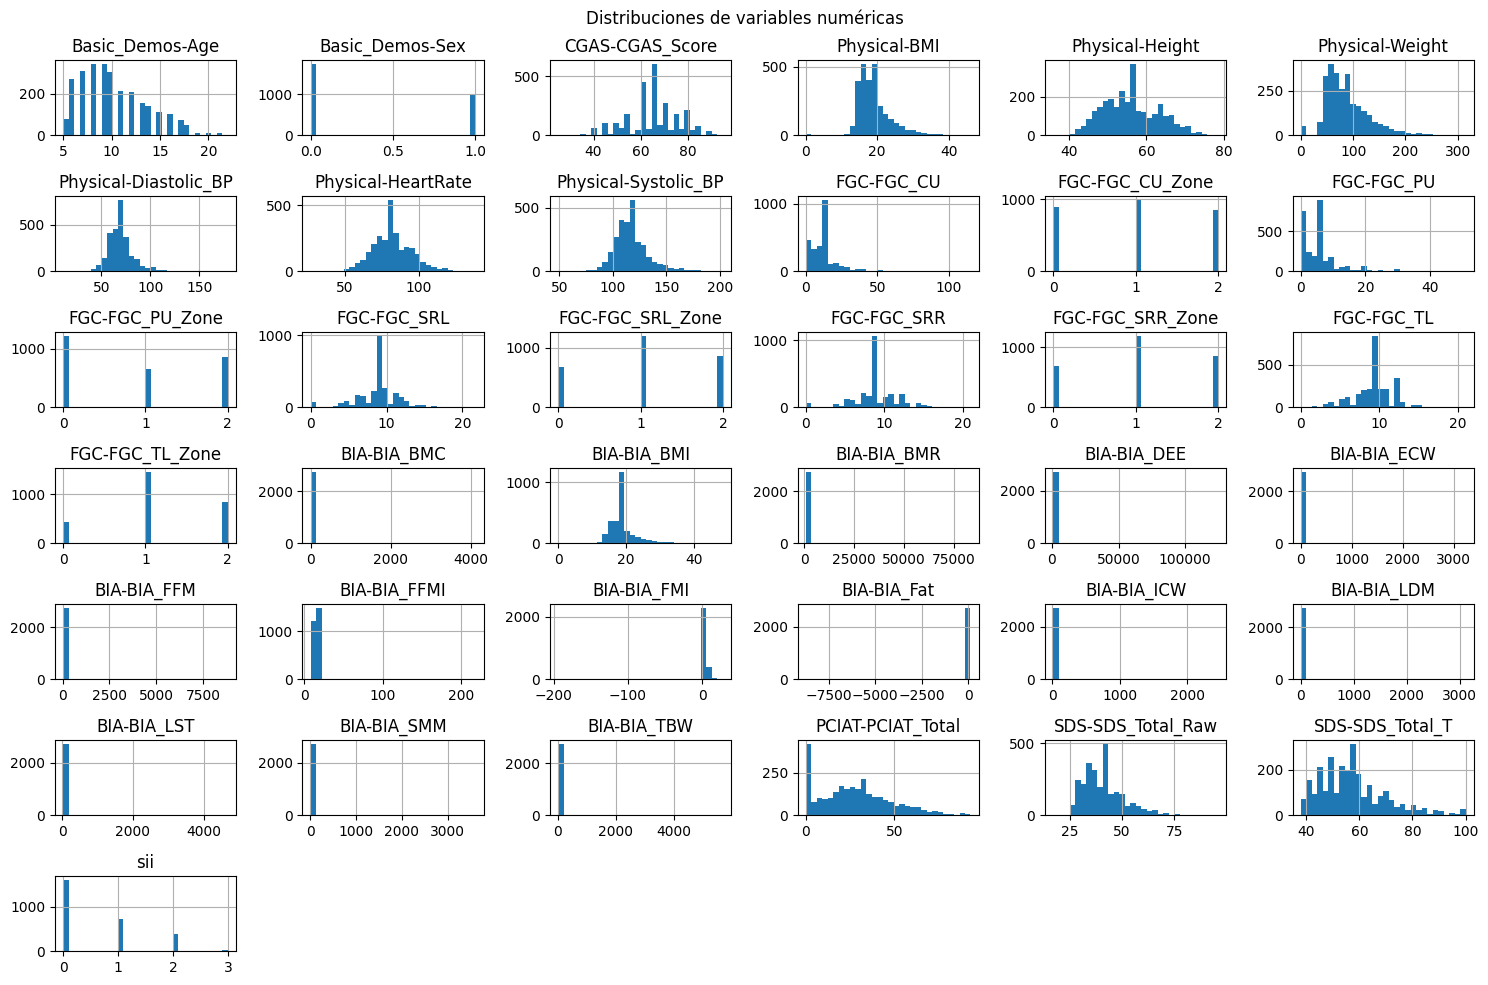

In [24]:
# Visualizar distribuciones de los datos numéricos
train_df[numeric_cols].hist(figsize=(15,10), bins=30)
plt.suptitle('Distribuciones de variables numéricas')
plt.tight_layout()
plt.show()

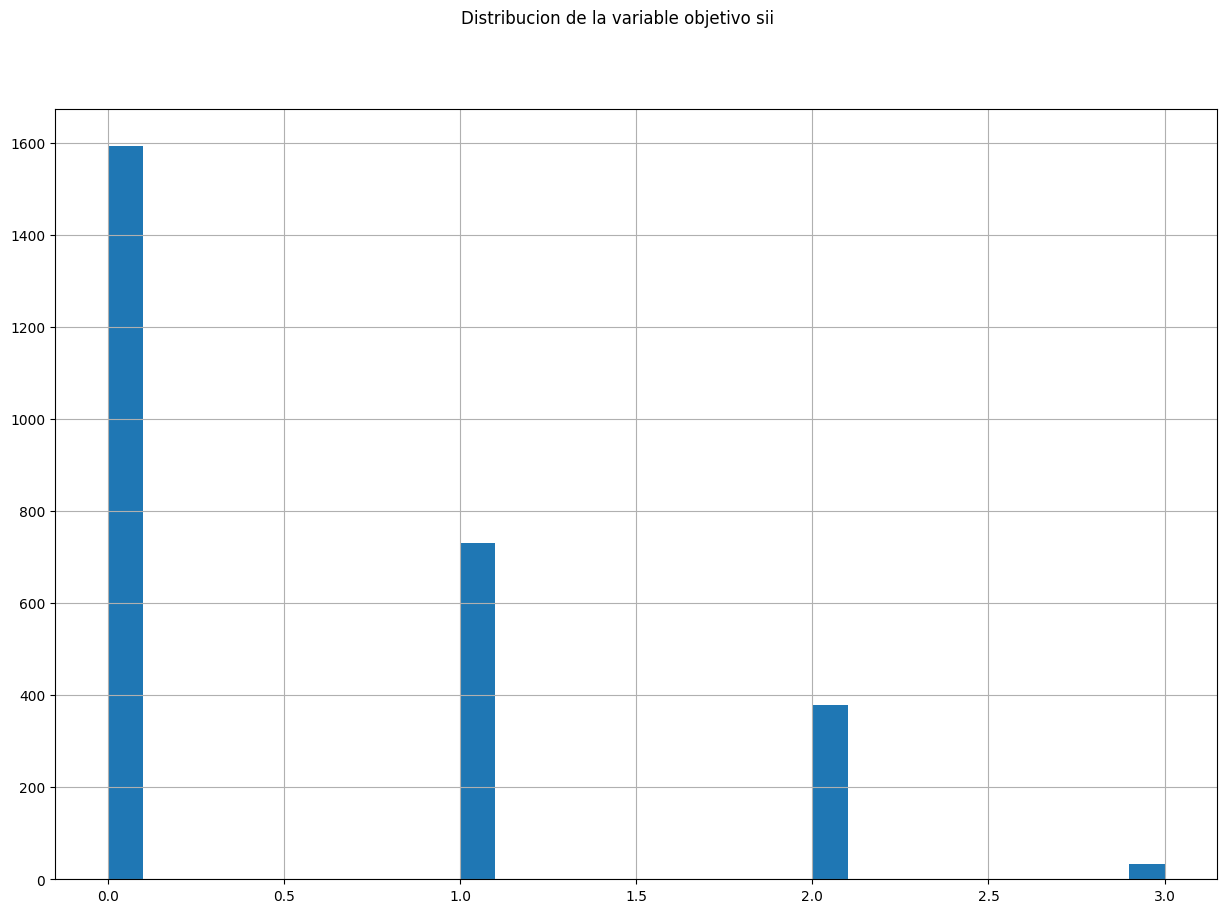

In [99]:
train_df['sii'].hist(figsize=(15,10), bins=30)
plt.suptitle('Distribucion de la variable objetivo sii')
plt.show()

##### Análisis de correlación

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
# Eliminar características con varianza por debajo de un umbral (ej. 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(train_df.drop('sii', axis=1))
low_variance_features = train_df.drop('sii', axis=1).columns[~selector.get_support()]
train_df = train_df.drop(columns=low_variance_features)
print(f"Características eliminadas por baja varianza: {low_variance_features.tolist()}")

Características eliminadas por baja varianza: ['PCIAT-PCIAT_12_3.0', 'PCIAT-PCIAT_12_4.0', 'PCIAT-PCIAT_12_5.0']


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Calcular la correlación de Pearson con SII
correlation_matrix = train_df.corr()

matrix = correlation_matrix['sii'].sort_values(ascending=False)

display(correlation_matrix['sii'].sort_values(ascending=False))

sii                   1.000000
PCIAT-PCIAT_Total     0.899681
PCIAT-PCIAT_05_5.0    0.558243
PCIAT-PCIAT_02_5.0    0.517706
PCIAT-PCIAT_03_5.0    0.500119
                        ...   
PCIAT-PCIAT_15_1.0   -0.211702
PCIAT-PCIAT_17_1.0   -0.212994
PCIAT-PCIAT_03_1.0   -0.241223
PCIAT-PCIAT_03_2.0   -0.247498
PCIAT-PCIAT_05_1.0   -0.267322
Name: sii, Length: 175, dtype: float64

In [29]:
# Calcular correlación con la variable objetivo
correlation_with_target = correlation_matrix['sii'].drop('sii')
low_corr_threshold = 0.1
low_corr_features = correlation_with_target[abs(correlation_with_target) < low_corr_threshold].index.tolist()

# Eliminar características con baja correlación
train_df = train_df.drop(columns=low_corr_features)
print(f"Características eliminadas por baja correlación con 'sii': {low_corr_features}")


Características eliminadas por baja correlación con 'sii': ['CGAS-CGAS_Score', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'Basic_Demos-Enroll_Season_Fall', 'Basic_Demos-Enroll_Season_Spring', 'Basic_Demos-Enroll_Season_Summer', 'Basic_Demos-Enroll_Season_Winter', 'CGAS-Season_Fall', 'CGAS-Season_Spring', 'CGAS-Season_Summer', 'CGAS-Season_Winter', 'Physical-Season_Fall', 'Physical-Season_Spring', 'Physical-Season_Summer', 'Physical-Season_Winter', 'FGC-Season_Fall', 'FGC-Season_Spring', 'FGC-Season_Summer', 'FGC-Season_Winter', 'BIA-Season_Fall', 'BIA-Season_Spring', 'BIA-Season_Summer', 'BIA-Season_Winter', 'PCIAT-Season_Fall', 'PCIAT-Season_Spring',

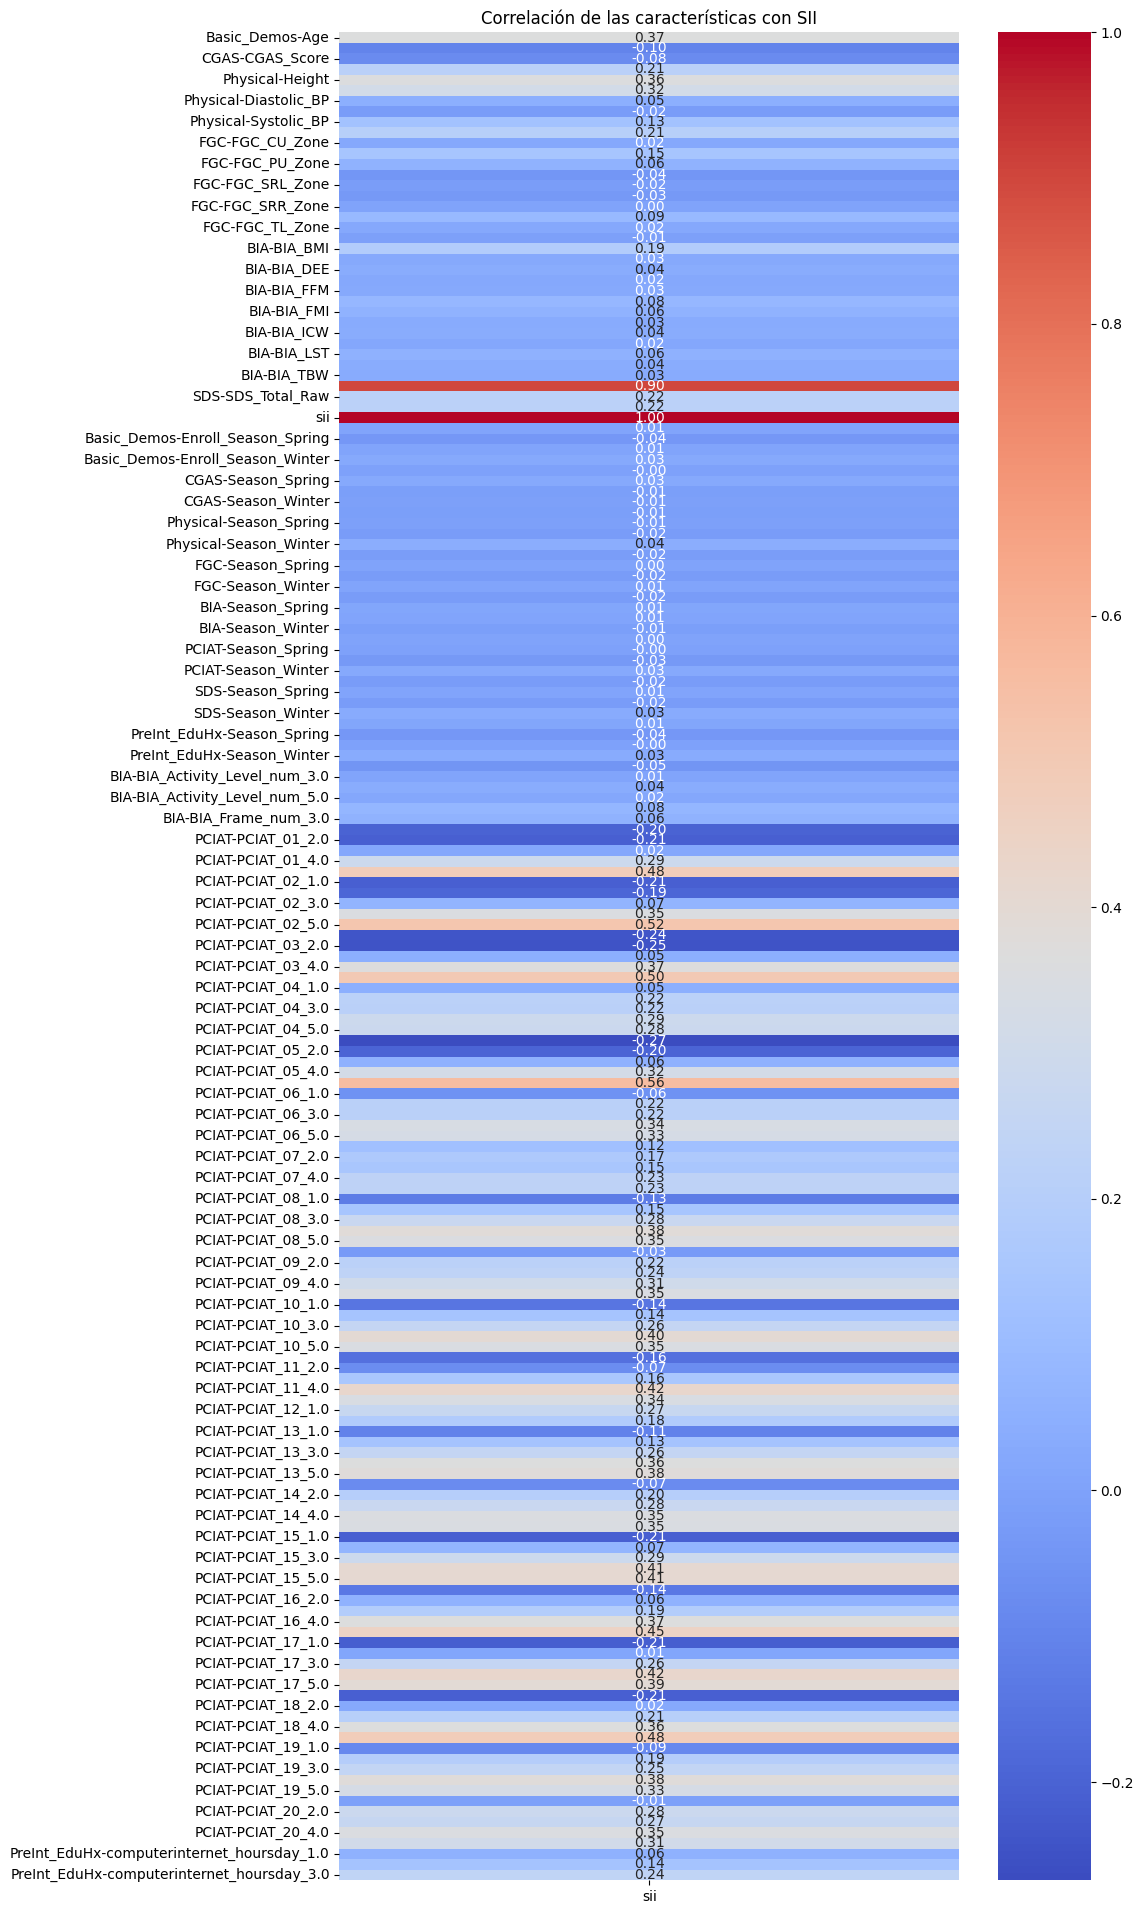

In [30]:
# Visualizar la correlación con SII
plt.figure(figsize=(10, 24))
sns.heatmap(correlation_matrix[['sii']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación de las características con SII')
plt.show()

In [31]:
# Encontrar pares de características altamente correlacionadas
high_corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print(f"Pares de características con alta correlación (> {high_corr_threshold}):")

for pair in high_corr_pairs:
    print(f"({pair[0]}, {pair[1]})")


Pares de características con alta correlación (> 0.8):
(Physical-Height, Basic_Demos-Age)
(Physical-Weight, Physical-BMI)
(Physical-Weight, Physical-Height)
(FGC-FGC_PU_Zone, FGC-FGC_CU_Zone)
(FGC-FGC_SRR, FGC-FGC_SRL)
(FGC-FGC_SRR_Zone, FGC-FGC_SRL_Zone)
(BIA-BIA_BMI, Physical-BMI)
(BIA-BIA_BMR, BIA-BIA_BMC)
(BIA-BIA_DEE, BIA-BIA_BMC)
(BIA-BIA_DEE, BIA-BIA_BMR)
(BIA-BIA_ECW, BIA-BIA_BMC)
(BIA-BIA_ECW, BIA-BIA_BMR)
(BIA-BIA_ECW, BIA-BIA_DEE)
(BIA-BIA_FFM, BIA-BIA_BMC)
(BIA-BIA_FFM, BIA-BIA_BMR)
(BIA-BIA_FFM, BIA-BIA_DEE)
(BIA-BIA_FFM, BIA-BIA_ECW)
(BIA-BIA_Fat, BIA-BIA_BMC)
(BIA-BIA_Fat, BIA-BIA_BMR)
(BIA-BIA_Fat, BIA-BIA_DEE)
(BIA-BIA_Fat, BIA-BIA_ECW)
(BIA-BIA_Fat, BIA-BIA_FFM)
(BIA-BIA_ICW, BIA-BIA_BMC)
(BIA-BIA_ICW, BIA-BIA_BMR)
(BIA-BIA_ICW, BIA-BIA_DEE)
(BIA-BIA_ICW, BIA-BIA_ECW)
(BIA-BIA_ICW, BIA-BIA_FFM)
(BIA-BIA_ICW, BIA-BIA_Fat)
(BIA-BIA_LDM, BIA-BIA_BMC)
(BIA-BIA_LDM, BIA-BIA_BMR)
(BIA-BIA_LDM, BIA-BIA_DEE)
(BIA-BIA_LDM, BIA-BIA_ECW)
(BIA-BIA_LDM, BIA-BIA_FFM)
(BIA-BIA_LDM, 

#### 2. Implementar un método de reagrupamiento, o visualización con PCA o t-SNE de los datos de entrenamiento, que permita ver si hay ciertos patrones claros.

##### PCA

In [242]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [243]:
# Separar características y objetivo
X = train_df.drop('sii', axis=1)
y = train_df['sii']

In [244]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [245]:
# Aplicar PCA
n_components = 20
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components+1)])
pca_df['SII'] = y.values

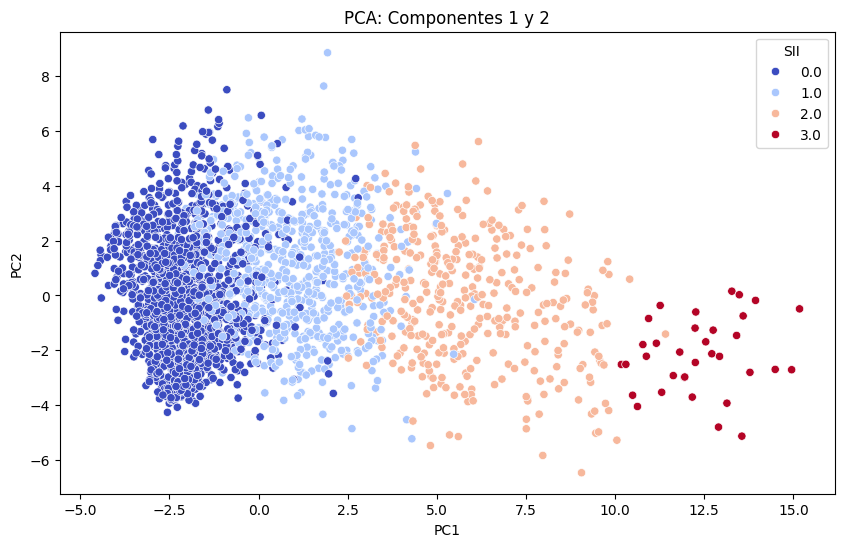

In [246]:
# Visualizar los resultados de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='SII', palette='coolwarm')
plt.title('PCA: Componentes 1 y 2')
plt.show()

In [247]:
# revisar la cantidad de varianza explicada por cada componente principal para entender qué tan bien representan los datos originales.
explained_variance_ratio = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(explained_variance_ratio)

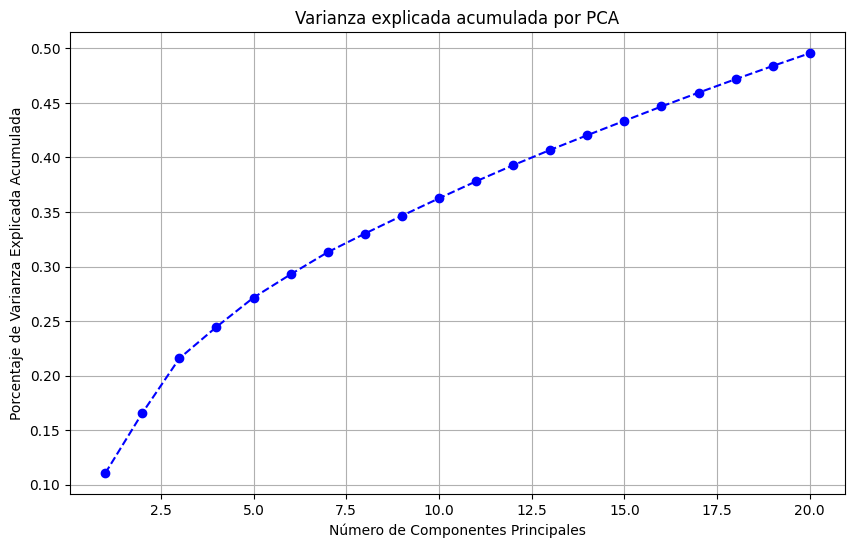

In [248]:
# Gráfica de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada Acumulada')
plt.grid()
plt.show()

In [249]:
# Imprimir varianza explicada por los primeros 10 componentes
for i, var in enumerate(explained_variance_ratio[:n_components], start=1):
    print(f"Varianza explicada por el Componente Principal {i}: {var:.2f}")
print(f"Varianza explicada acumulada por los 20 componentes: {varianza_acumulada[19]:.2f}")

Varianza explicada por el Componente Principal 1: 0.11
Varianza explicada por el Componente Principal 2: 0.06
Varianza explicada por el Componente Principal 3: 0.05
Varianza explicada por el Componente Principal 4: 0.03
Varianza explicada por el Componente Principal 5: 0.03
Varianza explicada por el Componente Principal 6: 0.02
Varianza explicada por el Componente Principal 7: 0.02
Varianza explicada por el Componente Principal 8: 0.02
Varianza explicada por el Componente Principal 9: 0.02
Varianza explicada por el Componente Principal 10: 0.02
Varianza explicada por el Componente Principal 11: 0.02
Varianza explicada por el Componente Principal 12: 0.01
Varianza explicada por el Componente Principal 13: 0.01
Varianza explicada por el Componente Principal 14: 0.01
Varianza explicada por el Componente Principal 15: 0.01
Varianza explicada por el Componente Principal 16: 0.01
Varianza explicada por el Componente Principal 17: 0.01
Varianza explicada por el Componente Principal 18: 0.01
V

##### t-SNE

In [250]:
from sklearn.manifold import TSNE

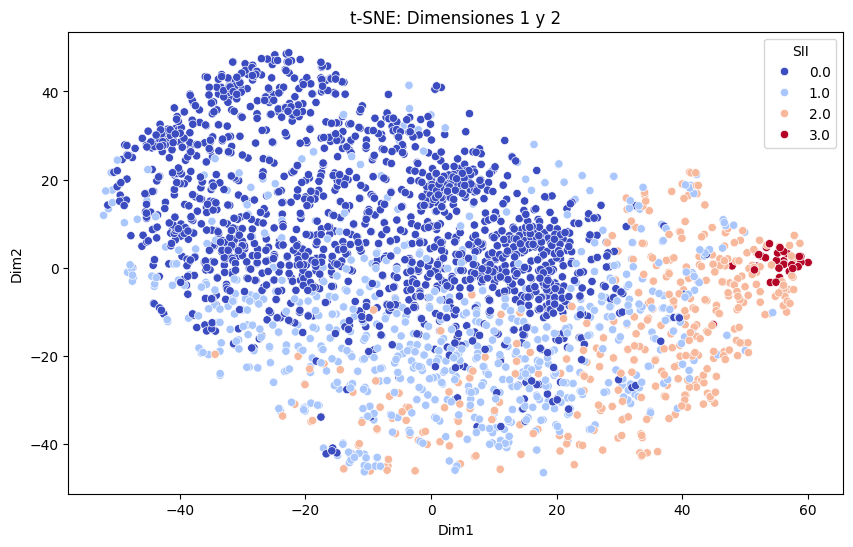

In [251]:
# Reduccion a n_components
n_components = 2

tsne = TSNE(n_components=n_components, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=[f'Dim{i}' for i in range(1, n_components+1)])
tsne_df['SII'] = y.values

# Visualizar los resultados de t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue='SII', palette='coolwarm')
plt.title('t-SNE: Dimensiones 1 y 2')
plt.show()

### 3. Preprocesamiento de los datos, y su codificación para usarlos como entrada a un modelo. Hay que tener en cuenta que este preprocesamiento debe poder integrarse mediante pipelines al modelo final.

##### Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [253]:
# Separar los datos en entrenamiento y validación para Random Forest
X_train, X_val, y_train, y_val = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de validación: {X_val.shape}")

Datos de entrenamiento: (2188, 96)
Datos de validación: (548, 96)


In [254]:
# Crear y entrenar el modelo de Random Forest (clasificación)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [255]:
# Obtener las importancias de las características
importances = rf.feature_importances_
feature_names = train_df.drop('sii', axis=1).columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [256]:
# Obtener la importancia de las características
importances = rf.feature_importances_
feature_names = X.columns

In [257]:
# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Seleccionar las características más importantes (por ejemplo, las que tienen importancia > 0.01)
threshold = 0.01  # Ajusta este valor según tus necesidades
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].values
print(f"Número de características seleccionadas: {len(selected_features)}")

# Crear un nuevo conjunto de datos con las características seleccionadas
X_selected = train_df[selected_features]

Número de características seleccionadas: 24


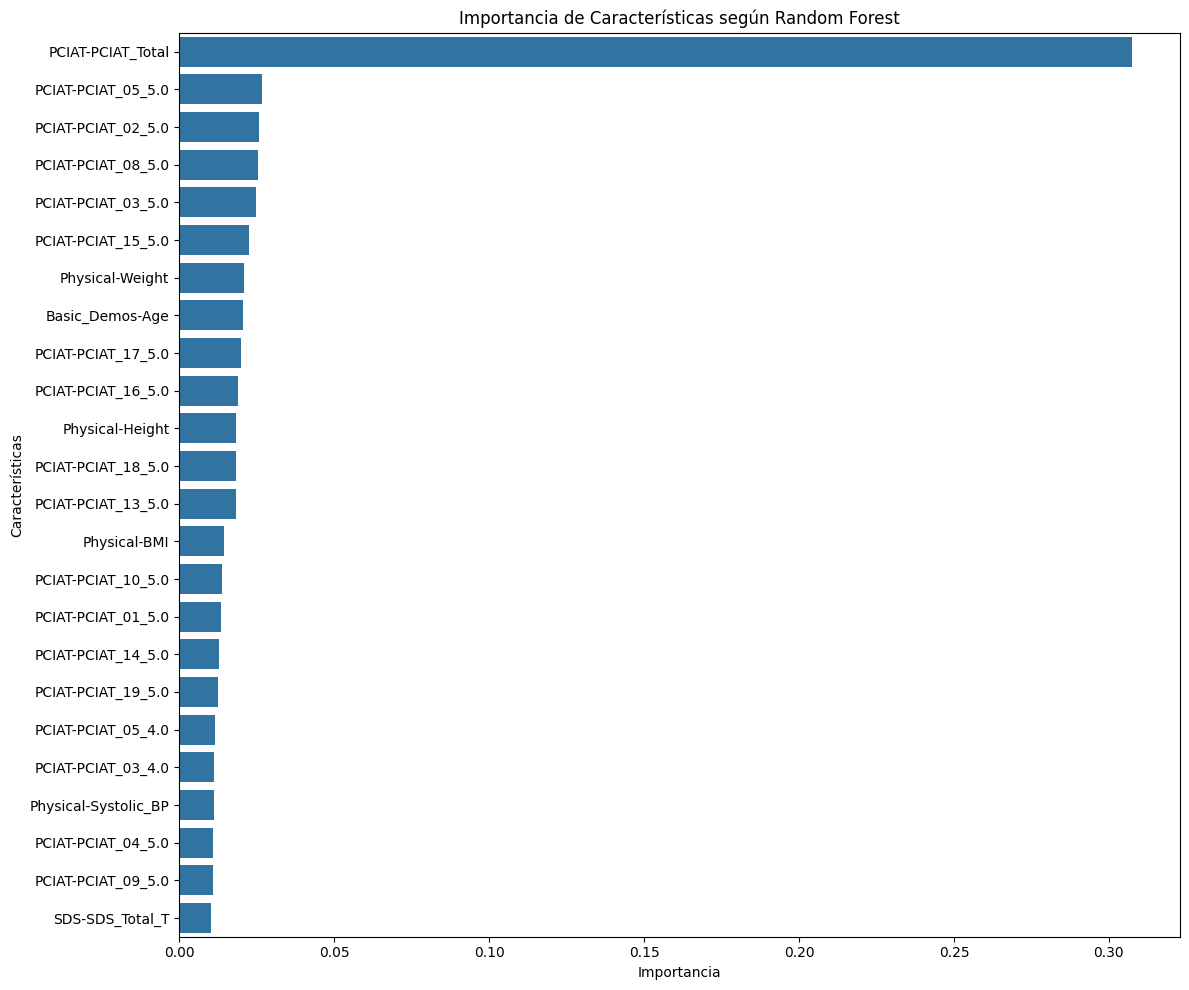

In [258]:
# Mostrar las 20 características más importantes
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(24))
plt.title('Importancia de Características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

In [263]:
print(X_selected.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCIAT-PCIAT_Total     2736 non-null   float64
 1   PCIAT-PCIAT_05_5.0    2736 non-null   bool   
 2   PCIAT-PCIAT_02_5.0    2736 non-null   bool   
 3   PCIAT-PCIAT_08_5.0    2736 non-null   bool   
 4   PCIAT-PCIAT_03_5.0    2736 non-null   bool   
 5   PCIAT-PCIAT_15_5.0    2736 non-null   bool   
 6   Physical-Weight       2736 non-null   float64
 7   Basic_Demos-Age       2736 non-null   int64  
 8   PCIAT-PCIAT_17_5.0    2736 non-null   bool   
 9   PCIAT-PCIAT_16_5.0    2736 non-null   bool   
 10  Physical-Height       2736 non-null   float64
 11  PCIAT-PCIAT_18_5.0    2736 non-null   bool   
 12  PCIAT-PCIAT_13_5.0    2736 non-null   bool   
 13  Physical-BMI          2736 non-null   float64
 14  PCIAT-PCIAT_10_5.0    2736 non-null   bool   
 15  PCIAT-PCIAT_01_5.0    2736

### 4. Decidir si es un problema de clasificación o de regresión (ambos podrían aplicar) y justificar porqué.

### 5. Utilizar un modelo inicial simple que permita establecer un baseline del problema.

### 6. Usar algún método de búsqueda de hiperparámetros y seleccionar el modelo de aprendizaje que consideres más adecuado. Justificar la selección.

### 7. Revisar y mostrar la calidad del modelo retenido usando métodos (los que consideren mejor adaptados) como k-cross-fold-validation, curvas de aprendizaje, curvas RoC, matrices de confusión o métricas de entrenamiento y validación.
